In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open('UCI HAR Dataset/features.txt') as file:
    features = [line.split()[1] for line in file.readlines()]

In [6]:
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None)
X_train.columns = features
X_train['subject'] = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', header=None)
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1


In [8]:
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', names=['activity'])
y_train.head()

,activity
0,5
1,5
2,5
3,5
4,5


In [12]:
train_data = X_train
train_data['activity'] = y_train
train_data['activity_name'] = y_train['activity'].map({1: 'walking', 2:'walking_upstairs',3:'walking_downstairs', 4:'sitting', 5:'standing',6:'laying'})
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity,activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,standing


In [16]:
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None)
X_test.columns = features
X_test['subject'] = pd.read_csv('UCI HAR Dataset/test/subject_test.txt', header=None)
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2


In [18]:
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', names=['activity'])
y_test.head()

,activity
0,5
1,5
2,5
3,5
4,5


In [20]:
test_data = X_test
test_data['activity'] = y_test
test_data['activity_name'] = y_test['activity'].map({1: 'walking', 2:'walking_upstairs',3:'walking_downstairs', 4:'sitting', 5:'standing',6:'laying'})
test_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity,activity_name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,standing
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,standing
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,standing
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,standing
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,standing


In [22]:
print(f'Shape of train data: {train_data.shape}\nShape of test data: {test_data.shape}')

Shape of train data: (7352, 564)
Shape of test data: (2947, 564)


In [24]:
columns = train_data.columns
columns = columns.str.replace('()','', regex=False)
columns = columns.str.replace('-', '', regex=False)
columns = columns.str.replace(',','', regex=False)

train_data.columns = columns
test_data.columns = columns

In [26]:
train_data.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angle(tBodyAccMeangravity),angle(tBodyAccJerkMean)gravityMean),angle(tBodyGyroMeangravityMean),angle(tBodyGyroJerkMeangravityMean),angle(XgravityMean),angle(YgravityMean),angle(ZgravityMean),subject,activity,activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,standing


In [28]:
test_data.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angle(tBodyAccMeangravity),angle(tBodyAccJerkMean)gravityMean),angle(tBodyGyroMeangravityMean),angle(tBodyGyroJerkMeangravityMean),angle(XgravityMean),angle(YgravityMean),angle(ZgravityMean),subject,activity,activity_name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,standing
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,standing
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,standing
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,standing
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,standing


In [30]:
sum(train_data.duplicated())

0

In [32]:
sum(test_data.duplicated())

0

In [34]:
train_data.isnull().values.sum()

0

In [36]:
test_data.isnull().values.sum()

0

In [38]:
data = pd.concat([train_data, test_data], ignore_index=True)
data.shape

(10299, 564)

In [40]:
data['activity_name'].value_counts()

laying                1944
standing              1906
sitting               1777
walking               1722
walking_upstairs      1544
walking_downstairs    1406
Name: activity_name, dtype: int64

## KMeans

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, random_state=2).fit(data.drop(['subject', 'activity', 'activity_name'], axis=1)) for k in range(2, 11)] 

silhouette_scores = [silhouette_score(data.drop(['subject', 'activity', 'activity_name'], axis=1), model.labels_) for model in kmeans_per_k]

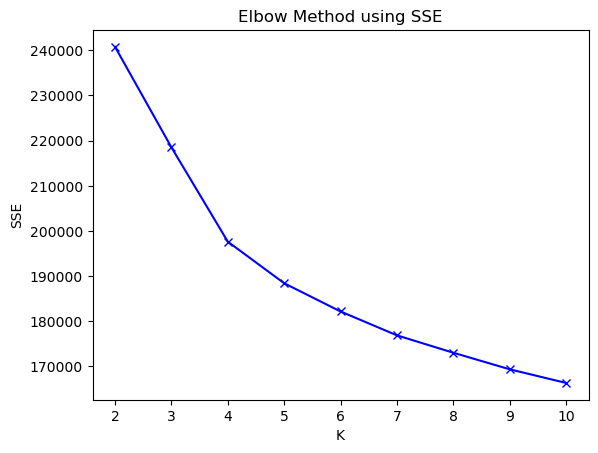

In [45]:
# elbow method

inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(2, 11), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method using SSE')
plt.show()

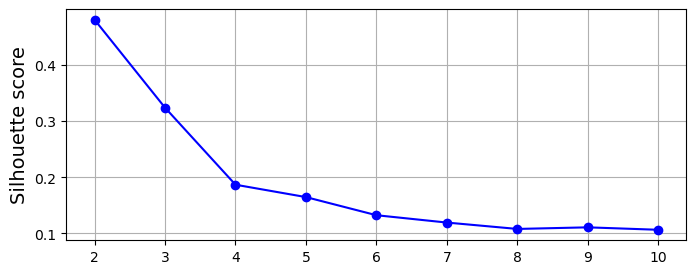

In [47]:
# silhouette_scores method

plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.ylabel("Silhouette score", fontsize=14)
plt.grid()
plt.show()

In [60]:
X = data.drop(['subject', 'activity', 'activity_name'], axis=1)

clf = KMeans(n_clusters=6, random_state=2)

clf.fit(X)
predictions = clf.predict(X)

In [62]:
for an in data['activity_name'].unique():
    print(f'Activity: {an}')
    print(pd.Series(predictions).iloc[data[['activity', 'activity_name']][data['activity_name']==an].index].value_counts())

Activity: standing
5    1232
1     674
dtype: int64
Activity: sitting
5    1253
1     472
2      49
0       3
dtype: int64
Activity: laying
2    1761
1     171
0      12
dtype: int64
Activity: walking
3    872
0    694
4    156
dtype: int64
Activity: walking_downstairs
3    758
4    463
0    185
dtype: int64
Activity: walking_upstairs
0    1163
3     299
4      82
dtype: int64


In [64]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=3, linewidths=8,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(klasyfikator, X):
    # wyznaczanie granic decyzyjnych, podobnie jak w poprzednich notatnikach
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 100),
                         np.linspace(mins[1], maxs[1], 100))
    Z = klasyfikator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # rysowanie konturów granic 
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    
    # rysowanie danych
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    # centra klastrów można wyciągnąc za pomocą zmiennej cluster_centers_
    plot_centroids(klasyfikator.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

In [66]:
plt.figure(figsize=(10, 5))
plot_decision_boundaries(clf, X)
plt.show()

C:\Users\tomas\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but KMeans is expecting 561 features as input.

<Figure size 1000x500 with 0 Axes>

Kombinowałem jak zmienić rozmiary linspace żeby póżniej móc zrobić reshape i do funkcji predict podać macierz z 561 kolumnami, ale to też nie wyszło.
Funkcja działa jak się jej podaje model ćwiczony na dwóch kolumnach, ale z kolei taki model do niczego się nie nadaje. 

In [98]:
std = []

for f in features:
    if 'std' in f and len(std) < 32:
        f1 = f.replace('()','')
        f2 = f1.replace('-', '')
        f3 = f2.replace(',','')
        std.append(f3)
len(std)

32

In [108]:
drop_list = std + ['subject', 'activity', 'activity_name']
X = data.drop(drop_list, axis=1)
X.shape

(10299, 529)

In [110]:
clf = KMeans(n_clusters=6, random_state=2)

clf.fit(X)
predictions = clf.predict(X)

In [116]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=3, linewidths=8,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(klasyfikator, X):
    # wyznaczanie granic decyzyjnych, podobnie jak w poprzednich notatnikach
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 23),
                         np.linspace(mins[1], maxs[1], 23))
    Z = klasyfikator.predict(np.transpose(np.c_[xx.ravel(), yy.ravel()]))
    # Z = Z.reshape(xx.shape)

    # rysowanie konturów granic 
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    
    # rysowanie danych
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    # centra klastrów można wyciągnąc za pomocą zmiennej cluster_centers_
    plot_centroids(klasyfikator.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

C:\Users\tomas\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


TypeError: Input z must be 2D, not 1D

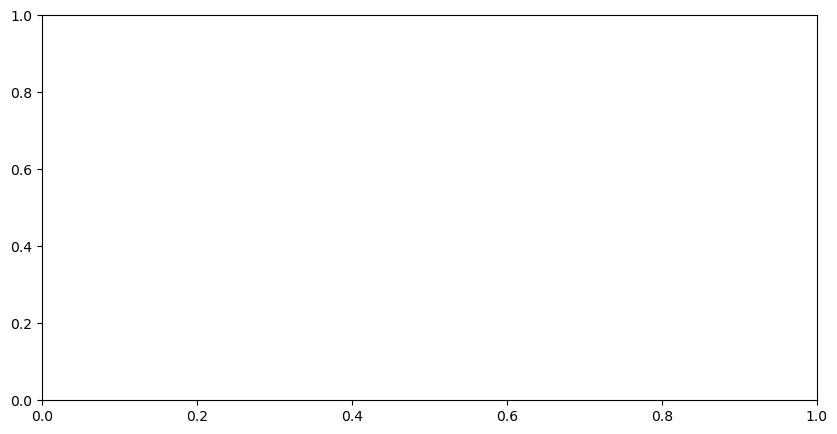

In [118]:
plt.figure(figsize=(10, 5))
plot_decision_boundaries(clf, X)
plt.show()

Teraz z kolei jest problem ze kształtem Z.

## DBSCAN

In [128]:
from sklearn.cluster import DBSCAN

X = data.drop(['subject', 'activity', 'activity_name'], axis=1)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [133]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

InvalidIndexError: (slice(None, None, None), 0)

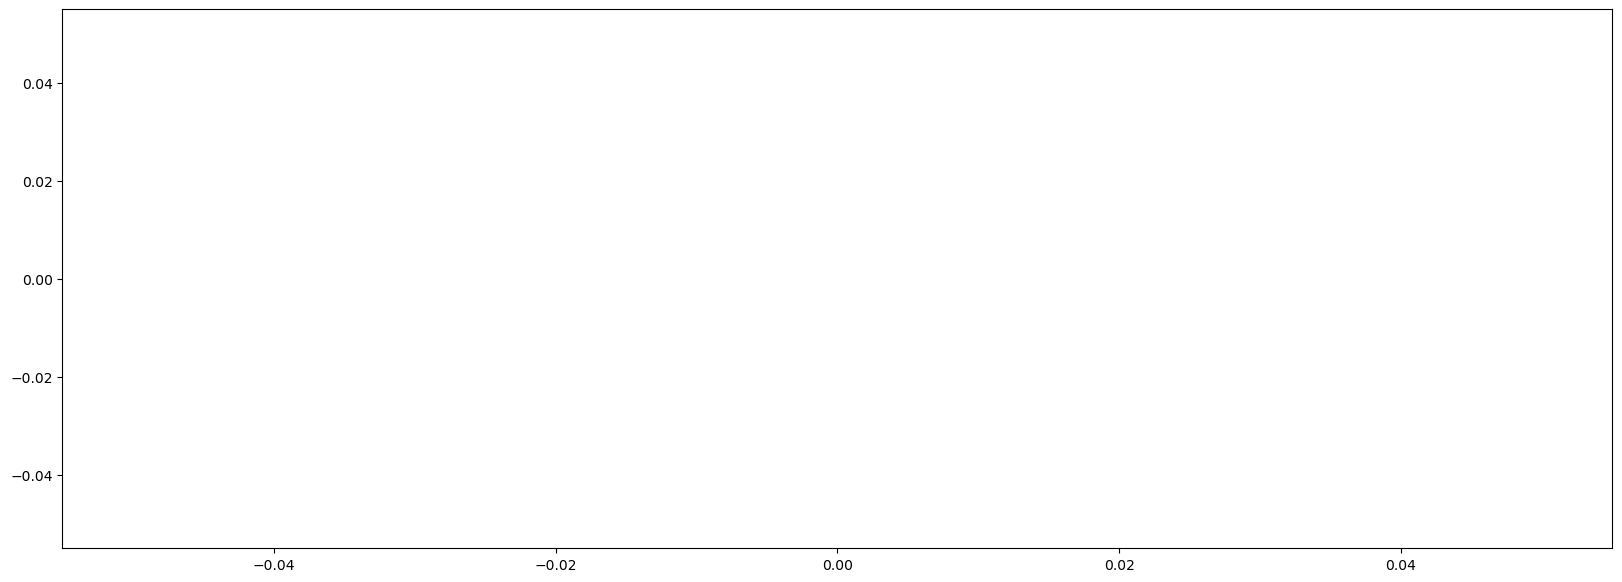

In [137]:
plt.figure(figsize=(20, 7))

plot_dbscan(dbscan, X, size=100)

plt.show()

## Gaussian Mixture Models (GNN)

In [143]:
from matplotlib.colors import LogNorm
 
def plot_gaussian_mixture(clf, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=3, colors='b')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.tick_params(labelleft=False)

In [146]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

ValueError: X has 2 features, but GaussianMixture is expecting 561 features as input.

<Figure size 1600x800 with 0 Axes>

## KMeans jako preprocessing danych

In [160]:
X_train = train_data.drop(['subject', 'activity', 'activity_name'], axis=1)
X_test = test_data.drop(['subject', 'activity', 'activity_name'], axis=1)
y_train = train_data['activity']
y_test = test_data['activity']

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

sk_folds = StratifiedKFold(n_splits = 5, shuffle=True, random_state=1)

print('Results without clustestering preprocessing', '\n','-'*100)

log_reg = LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2)
log_reg.fit(X_train, y_train)
scores = cross_val_score(log_reg, X_train, y_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Test data score:", log_reg.score(X_test, y_test))

print('\n', 'Results with clustestering preprocessing', '\n','-'*100)

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=100, random_state=2)),
    ("log_reg", LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2))])
pipeline.fit(X_train, y_train)
scores = cross_val_score(pipeline, X_train, y_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Test data score:", pipeline.score(X_test, y_test))

Results without clustestering preprocessing 
 ----------------------------------------------------------------------------------------------------
Cross Validation Scores:  [0.98640381 0.98300476 0.98367347 0.98503401 0.98231293]
Average CV Score:  0.9840857947529795
Number of CV Scores used in Average:  5
Test data score: 0.9613165931455717

 Results with clustestering preprocessing 
 ----------------------------------------------------------------------------------------------------
Cross Validation Scores:  [0.9510537  0.94425561 0.95782313 0.95918367 0.9462585 ]
Average CV Score:  0.9517149239029399
Number of CV Scores used in Average:  5
Test data score: 0.9222938581608415


In [185]:
from sklearn.linear_model import SGDClassifier

print('Results without clustestering preprocessing', '\n','-'*100)

sgd = SGDClassifier(random_state=1)
sgd.fit(X_train, y_train)
scores = cross_val_score(sgd, X_train, y_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Test data score:", log_reg.score(X_test, y_test))

print('\n', 'Results with clustestering preprocessing', '\n','-'*100)

pipeline_sgd = Pipeline([
    ("kmeans", KMeans(n_clusters=100, random_state=2)),
    ("sgd", SGDClassifier(random_state=1))])
pipeline_sgd.fit(X_train, y_train)
scores_sgd = cross_val_score(pipeline_sgd, X_train, y_train, cv = sk_folds)

print("Cross Validation Scores: ", scores_sgd)
print("Average CV Score: ", scores_sgd.mean())
print("Number of CV Scores used in Average: ", len(scores_sgd))
print("Test data score:", pipeline_sgd.score(X_test, y_test))

Results without clustestering preprocessing 
 ----------------------------------------------------------------------------------------------------
Cross Validation Scores:  [0.97484704 0.97552685 0.9829932  0.98503401 0.96802721]
Average CV Score:  0.9772856634156042
Number of CV Scores used in Average:  5
Test data score: 0.9613165931455717

 Results with clustestering preprocessing 
 ----------------------------------------------------------------------------------------------------
Cross Validation Scores:  [0.90958532 0.79061863 0.85170068 0.86258503 0.89115646]
Average CV Score:  0.8611292239533475
Number of CV Scores used in Average:  5
Test data score: 0.8846284356973193
